In [69]:
#Dylan Abeyratne and Matt Ng
#Ver 1.0
#4.29.19

import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import KMeans
#df.iloc[: , [2,8,25,27,28,33,34]] These are columns of interest

#Load Data
df = pd.read_excel('PERM_Disclosure_Data_FY2018_EOY.xlsx', 'PERM_FY2018')


In [75]:
dfclean = df
dfclean = dfclean.dropna(subset=['WAGE_OFFER_FROM_9089'])
dfclean = dfclean.dropna(subset=['WAGE_OFFER_TO_9089'])
dfclean = dfclean.dropna(subset=['WAGE_OFFER_UNIT_OF_PAY_9089'])
dfclean = dfclean.dropna(subset=['PW_AMOUNT_9089'])
dfclean = dfclean.dropna(subset=['CASE_STATUS'])
dfclean = dfclean.dropna(subset=['PW_SOC_TITLE'])
dfclean = dfclean.dropna(subset=['EMPLOYER_NAME'])
#Remove Withdrawn
dfclean = dfclean[dfclean.CASE_STATUS != 'Withdrawn']
#Remove Pay frequency other than year
dfclean = dfclean[dfclean.WAGE_OFFER_UNIT_OF_PAY_9089 != 'Bi-Weekly']
dfclean = dfclean[dfclean.WAGE_OFFER_UNIT_OF_PAY_9089 != 'Month']
dfclean = dfclean[dfclean.WAGE_OFFER_UNIT_OF_PAY_9089 != 'Week']
dfclean = dfclean[dfclean.WAGE_OFFER_UNIT_OF_PAY_9089 != 'Hour']
dfclean = dfclean.astype({"WAGE_OFFER_FROM_9089": float, "WAGE_OFFER_TO_9089": float, "PW_AMOUNT_9089": float})

In [77]:
#Specify Columns for X
X = dfclean.iloc[: , [27,33,34]]
# X df.iloc[: , [2,8,25,27,28,33,34]] This is code to identify all columns of interest
#X1 = df[['WAGE_OFFER_FROM_9089', 'WAGE_OFFER_TO_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089', 'PW_AMOUNT_9089', 'CASE_STATUS']]
X_scaled = preprocessing.scale(X)
dummies = pd.get_dummies(dfclean, columns = ["CASE_STATUS", "EMPLOYER_NAME", "PW_SOC_TITLE"])
dummies.iloc[: , [27,33,34]] = X_scaled
dummiesnum = dummies.iloc[: , [27,33,34]]

In [79]:
#Create empty dictionary
performance_map = {}

#Measuring the performance values 'k'
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=11).fit(dummiesnum)
    kmeans.cluster_centers_ 
    kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.
    performance_map[k] = kmeans.score(dummiesnum)
print(performance_map)

{1: -114099.0, 2: -73777.62492272913, 3: -49544.20665411737, 4: -33778.514752261784, 5: -25992.780995727848, 6: -21457.906449169426, 7: -18765.602755439704, 8: -16507.562960233143, 9: -14481.749191427794}


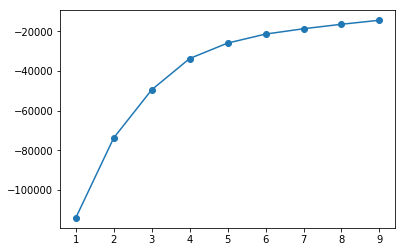

In [81]:
import matplotlib.pyplot as plt 
# use the elbow method to determine number of clusters
plt.scatter(performance_map.keys(),performance_map.values())
plt.plot(performance_map.keys(),performance_map.values())
plt.show()

In [82]:
kmeans = KMeans(n_clusters=5, random_state=11).fit(dummiesnum)
kmeans.labels_

array([0, 2, 0, ..., 4, 4, 2])

In [83]:
#add cluster labels to data and save to Excel
dfclean["label"] = kmeans.labels_
dfclean.to_excel("output.xlsx")